# الفصل الحادي عشر: اختبار الفرضيات في الموارد البشرية — دفتر أمثلة (Colab)

هذا الملف يجمع **جميع أمثلة بايثون** الواردة في الفصل،



## 1) تهيئة البيئة

سنثبت/نستورد الحزم اللازمة ونضبط بعض الإعدادات البسيطة.


In [1]:
# تثبيت الحزم (عند الحاجة)
!pip -q install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# اختياري
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)
np.random.seed(42)

print("Ready ✅")

Ready ✅


## 2) التحقق من التوزيع الطبيعي (Visual + Statistical)

يتضمن الفصل فحصًا بصريًا (Histogram + Q-Q Plot) ثم اختبارات شابيرو–ويلك وكولموغوروف–سميرنوف.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('HR_Small_Dataset.csv')
df.head()

,EmployeeID,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,JobSatisfaction,WorkLifeBalance
0,1001,29,4500,5,2,3,2
1,1002,45,8700,20,10,4,3
2,1003,34,6200,10,5,2,2
3,1004,50,10500,25,15,3,3
4,1005,41,7900,17,8,1,4


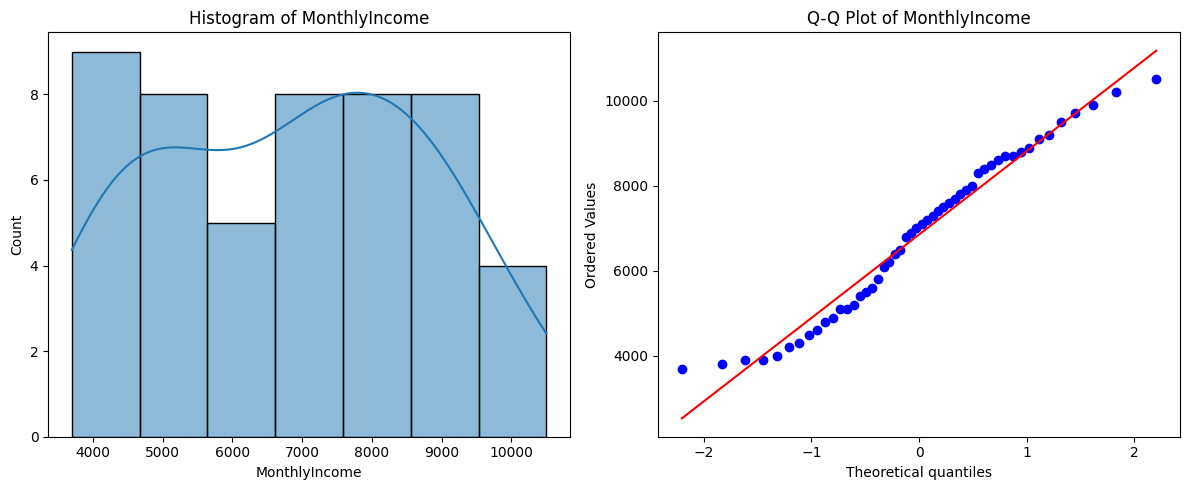

In [3]:
def plot_normality(col):
    plt.figure(figsize=(12, 5))
    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.tight_layout()
    plt.show()

# Example for one column
plot_normality('MonthlyIncome')

In [4]:
def normality_tests(col):
    print(f'\n=== Normality Tests for: {col} ===')
    # Shapiro-Wilk Test
    stat, p = stats.shapiro(df[col])
    print(f'Shapiro-Wilk: p = {p:.4f} → {"Normal" if p > 0.05 else "Not Normal"}')
    # Kolmogorov-Smirnov Test (بعد المعيَرة)
    norm_data = (df[col] - df[col].mean()) / df[col].std()
    stat, p = stats.kstest(norm_data, 'norm')
    print(f'Kolmogorov–Smirnov: p = {p:.4f} → {"Normal" if p > 0.05 else "Not Normal"}')

# Example
normality_tests('MonthlyIncome')


=== Normality Tests for: MonthlyIncome ===
Shapiro-Wilk: p = 0.0831 → Normal
Kolmogorov–Smirnov: p = 0.8503 → Normal


## 3) تجانس التباين: اختبار Levene

المثال يستخدم بيانات رواتب لثلاث إدارات (HR / Finance / IT) ثم ينفذ اختبار ليفين.


In [5]:
import pandas as pd
from scipy import stats

# إنشاء بيانات افتراضية لموظفين في 3 إدارات
data = {
    'MonthlyIncome': [4500, 4700, 4900, 5100, 5300,
                      7000, 7200, 7300, 7100, 7500,
                      8800, 9100, 8900, 9200, 9400],
    'Department': ['HR'] * 5 + ['Finance'] * 5 + ['IT'] * 5
}
df = pd.DataFrame(data)
df.head(15)

,MonthlyIncome,Department
0,4500,HR
1,4700,HR
2,4900,HR
3,5100,HR
4,5300,HR
5,7000,Finance
6,7200,Finance
7,7300,Finance
8,7100,Finance
9,7500,Finance


In [6]:
# إنشاء قوائم منفصلة لكل قسم
group_hr = df[df['Department'] == 'HR']['MonthlyIncome']
group_fin = df[df['Department'] == 'Finance']['MonthlyIncome']
group_it = df[df['Department'] == 'IT']['MonthlyIncome']

group_it, group_fin, group_hr

(10    8800
 11    9100
 12    8900
 13    9200
 14    9400
 Name: MonthlyIncome, dtype: int64,
 5    7000
 6    7200
 7    7300
 8    7100
 9    7500
 Name: MonthlyIncome, dtype: int64,
 0    4500
 1    4700
 2    4900
 3    5100
 4    5300
 Name: MonthlyIncome, dtype: int64)

In [7]:
stat, p = stats.levene(group_hr, group_fin, group_it)

print(f"Levene’s Test: p-value = {p:.4f} → "
      f"{'Equal variances (assumption met)' if p > 0.05 else 'Unequal variances (assumption violated)'}")

Levene’s Test: p-value = 0.5370 → Equal variances (assumption met)


## 4) اختبار Z لعينة واحدة (One-sample Z-test)

المثال يقارن متوسط رواتب العينة مع متوسط مرجعي (مثل متوسط السوق).


In [8]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest

# توليد بيانات الرواتب: 50 موظف بمتوسط 9200 وانحراف معياري 600
np.random.seed(42)
sample_salaries = np.random.normal(loc=9200, scale=600, size=50)
df = pd.DataFrame({'MonthlyIncome': sample_salaries})

# إجراء اختبار Z مقارنة بمتوسط مرجعي (مثلاً: 9000)
z_stat, p_val = ztest(df['MonthlyIncome'], value=9000)

print("=== Z-Test for Monthly Income (Using statsmodels) ===")
print(f"Z-score: {z_stat:.4f}")
print(f"p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: فرق دال إحصائيًا - نرفض الفرضية الصفرية.")
else:
    print("Conclusion: لا يوجد فرق دال - لا نرفض الفرضية الصفرية.")

=== Z-Test for Monthly Income (Using statsmodels) ===
Z-score: 0.8169
p-value: 0.4140
Conclusion: لا يوجد فرق دال - لا نرفض الفرضية الصفرية.


## 5) اختبار T لعينة واحدة (One-sample T-test)

المثال يفحص ما إذا كان متوسط الرضا الوظيفي يختلف عن قيمة مرجعية (مثل 3.5 من 5).


In [9]:
import pandas as pd
from scipy.stats import ttest_1samp

satisfaction_scores = pd.read_csv('satisfaction_scores.csv')
# للتوافق مع النص الذي يغيّر اسم العمود الأول
if satisfaction_scores.columns[0] != 'scores':
    satisfaction_scores.columns.values[0] = 'scores'

t_stat, p_value = ttest_1samp(satisfaction_scores['scores'], popmean=3.5)

print("=== One-Sample T-Test: Job Satisfaction ===")
print(f"Sample Mean: {satisfaction_scores['scores'].mean():.4f}")
print("Hypothesized Mean: 3.5")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: هناك فرق دال إحصائيًا - نرفض الفرضية الصفرية.")
else:
    print("Conclusion: لا يوجد فرق دال - لا نرفض الفرضية الصفرية.")

=== One-Sample T-Test: Job Satisfaction ===
Sample Mean: 3.6930
Hypothesized Mean: 3.5
T-Statistic: 3.5577
P-Value: 0.0008
Conclusion: هناك فرق دال إحصائيًا - نرفض الفرضية الصفرية.


## 6) اختبار T لعينتين مستقلتين (Independent samples T-test)

المثال يقارن متوسط الرواتب بين الذكور والإناث.


In [10]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

df = pd.read_csv('salaries.csv')
df.head()

,Salary,Gender
0,9847.699907,Male
1,9403.214989,Male
2,9953.381977,Male
3,10566.120899,Male
4,9336.092638,Male


In [11]:
t_stat, p_value = ttest_ind(
    df[df['Gender'] == 'Male']['Salary'],
    df[df['Gender'] == 'Female']['Salary'],
    equal_var=True  # يفترض تساوي التباين (اختبره مسبقاً عند الحاجة)
)

print("=== Independent Samples T-Test: Male vs Female Salaries ===")
print(f"Mean (Male): {df[df['Gender'] == 'Male']['Salary'].mean():.2f}")
print(f"Mean (Female): {df[df['Gender'] == 'Female']['Salary'].mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: هناك فرق دال إحصائيًا بين متوسط رواتب الذكور والإناث.")
else:
    print("Conclusion: لا يوجد فرق دال إحصائيًا - لا نرفض الفرضية الصفرية.")

=== Independent Samples T-Test: Male vs Female Salaries ===
Mean (Male): 9342.17
Mean (Female): 9112.45
T-Statistic: 1.8141
P-Value: 0.0727
Conclusion: لا يوجد فرق دال إحصائيًا - لا نرفض الفرضية الصفرية.


<Figure size 800x500 with 0 Axes>

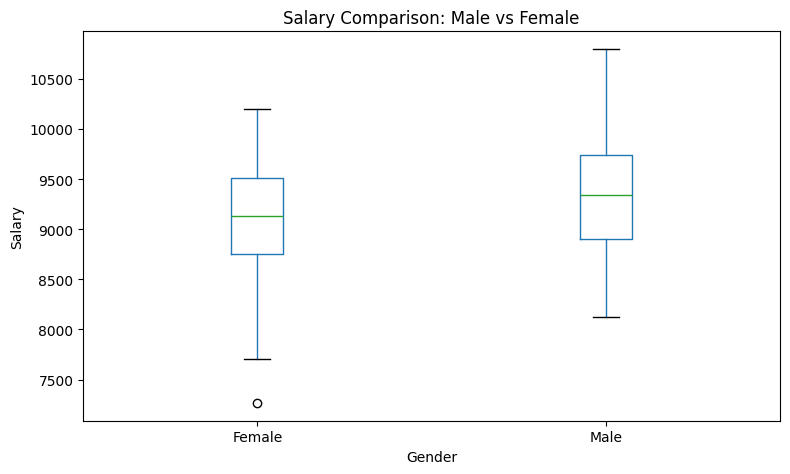

In [12]:
# تمثيل بصري (Boxplot)
plt.figure(figsize=(8, 5))
df.boxplot(column='Salary', by='Gender', grid=False)
plt.title('Salary Comparison: Male vs Female')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

## 7) اختبار T لعينتين مترابطتين (Paired T-test)

المثال يقارن أداء الموظفين قبل وبعد تدريب لنفس الأفراد.


In [14]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

df = pd.read_csv('perf_improvement.csv')
df.head()

,Unnamed: 0,Before,After
0,0,72.483571,73.076744
1,1,69.308678,79.717791
2,2,73.238443,76.184454
3,3,77.615149,76.384306
4,4,68.829233,75.119413


In [15]:
t_stat, p_value = ttest_rel(df['After'], df['Before'])

print("=== Paired T-Test: Training Impact on Performance ===")
print(f"Mean Before Training: {df['Before'].mean():.2f}")
print(f"Mean After Training: {df['After'].mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: التدريب أدى إلى تحسن في الأداء - هناك فرق دال إحصائيًا.")
else:
    print("Conclusion: لا يمكن الجزم بأن التدريب أحدث فرقًا - لا يوجد فرق دال.")

=== Paired T-Test: Training Impact on Performance ===
Mean Before Training: 69.06
Mean After Training: 71.57
T-Statistic: 3.6991
P-Value: 0.0009
Conclusion: التدريب أدى إلى تحسن في الأداء - هناك فرق دال إحصائيًا.


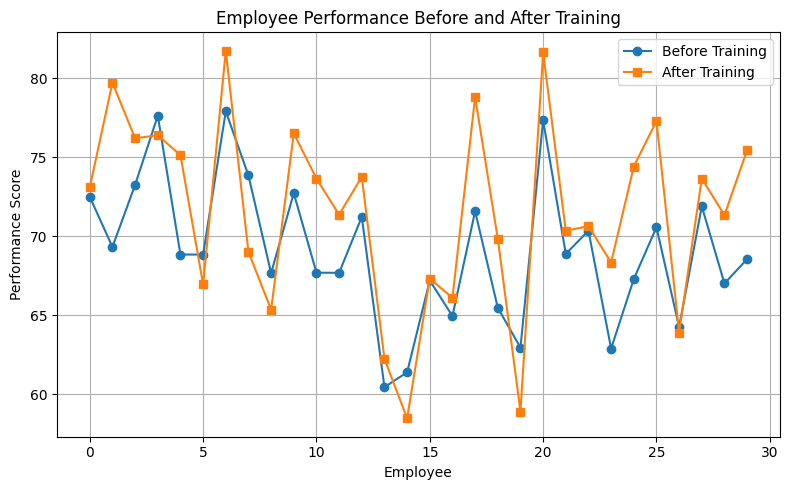

In [16]:
# رسم بياني للمقارنة
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['Before'], marker='o', label='Before Training')
plt.plot(df.index, df['After'], marker='s', label='After Training')
plt.title('Employee Performance Before and After Training')
plt.xlabel('Employee')
plt.ylabel('Performance Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 8) تحليل التباين الأحادي (One-way ANOVA)

المثال يقارن متوسط الرضا الوظيفي بين ثلاث إدارات: HR وFinance وMarketing.


In [17]:
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv('satisfaction_across_departments.csv')
df.sample(n=10, random_state=42)

,Unnamed: 0,Satisfaction,Department
40,40,3.569233,Finance
22,22,3.827011,HR
55,55,3.665640,Finance
70,70,3.708419,Marketing
0,0,3.998686,HR
26,26,3.339603,HR
39,39,3.298431,Finance
65,65,4.006872,Marketing
10,10,3.614633,HR
44,44,2.460739,Finance


In [18]:
anova_result = f_oneway(
    df[df['Department'] == 'HR']['Satisfaction'],
    df[df['Department'] == 'Finance']['Satisfaction'],
    df[df['Department'] == 'Marketing']['Satisfaction']
)

print("=== One-Way ANOVA: Job Satisfaction Across Departments ===")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.6f}")
if anova_result.pvalue < 0.05:
    print("Conclusion: يوجد فرق دال إحصائيًا في الرضا الوظيفي بين الإدارات.")
else:
    print("Conclusion: لا يوجد فرق دال - لا نرفض الفرضية الصفرية.")

=== One-Way ANOVA: Job Satisfaction Across Departments ===
F-statistic: 19.7604
P-value: 0.000000
Conclusion: يوجد فرق دال إحصائيًا في الرضا الوظيفي بين الإدارات.


<Figure size 800x500 with 0 Axes>

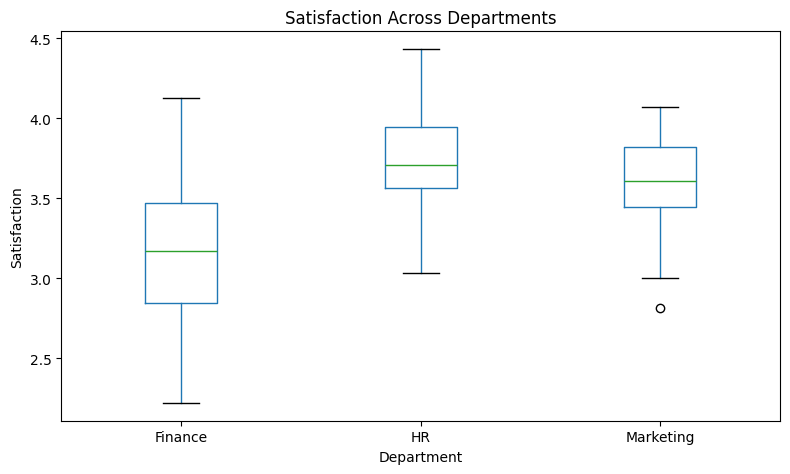

In [19]:
# تمثيل بصري سريع
plt.figure(figsize=(8, 5))
df.boxplot(column='Satisfaction', by='Department', grid=False)
plt.title('Satisfaction Across Departments')
plt.suptitle('')
plt.xlabel('Department')
plt.ylabel('Satisfaction')
plt.tight_layout()
plt.show()

## 9) اختبار المتابعة Tukey HSD (Post-hoc)

يُستخدم عند دلالة ANOVA لتحديد أي الأزواج تحديدًا تختلف.


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Satisfaction'], groups=df['Department'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Finance        HR   0.5853    0.0  0.3509 0.8197   True
Finance Marketing   0.4644    0.0    0.23 0.6989   True
     HR Marketing  -0.1209 0.4391 -0.3553 0.1135  False
-------------------------------------------------------


## خاتمة

بات هذا الدفتر جاهزًا للاستخدام كمرجع سريع للأمثلة. إذا رغبت، يمكنني أيضًا:
1) جعل كل مثال ضمن دالة قابلة لإعادة الاستخدام.
2) إضافة أسئلة تدريبية قصيرة بعد كل مثال.
3) ربط الأمثلة ببياناتك الحقيقية بدل البيانات الافتراضية.
